# Data Cleaning

### Check for the null:
values when we work on the data analysis one of the main constraints is data set having null values so in the initial step itself we makesure that thare are no null values.
### Removing duplicates: 
when the dataset contains duplicate values the we wil get skewed results, incorrect model predictions and it will increase the size of data set unnecessarily
### Transformation data
To ensure analysis, we addressed inconsistencies in the dataset by transforming the data. This allowed us to conduct a more reliable hypothesis analysis based on cons.
### Added new columns
We added a new column to calculate the BMI, which enhances the efficiency and accuracy of our data analysis. This additional metric provides deeper insights into the dataset.
### Handled Categorical Data: 
We changed some of the categorical data so that we are able to perform the operation on the dataset.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

df = pd.read_csv("user_nutritional_data.csv")
df.info()
#Identifing missing values by defining potential representations of missing data and used df.isin() to check for their presence.
missing_values = ["NA", np.nan, " ", None]
missing= df.isin(missing_values)
missing.head()

#Removed duplicate rows from the DataFrame using df.drop_duplicates() and updated the dataset.
duplicate_rows = df[df.duplicated()]
len(duplicate_rows)

df = df.drop_duplicates()

#Added new columns, BMI using the formula: BMI = Weight / (Height in meters)^2. 
df["BMI"] = df["Weight"] / ((df["Height"]/100) ** 2)

#Replaced numeric values in the 'Physical exercise' column with descriptive labels for better interpretability.
df['Physical exercise'] = df['Physical exercise'].replace({
    0: 'None',
    1: 'Low',
    2: 'Moderate',
    3: 'High',
    4: 'Very High'
})

#Binned the 'Age' column into specific age groups using pd.cut() to categorize ages into defined ranges.
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2182 non-null   int64  
 1   Age                    2182 non-null   int64  
 2   Daily meals frequency  2182 non-null   int64  
 3   Physical exercise      2182 non-null   int64  
 4   Height                 2182 non-null   int64  
 5   Weight                 2182 non-null   float64
 6   BMR                    2182 non-null   float64
 7   Carbs                  2182 non-null   float64
 8   Proteins               2182 non-null   float64
 9   Fats                   2182 non-null   float64
 10  Calories               2182 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 187.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 2098 entries, 0 to 2181
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  -----

,Gender,Age,Daily meals frequency,Physical exercise,Height,Weight,BMR,Carbs,Proteins,Fats,Calories,BMI,Age Group
0,0,29,3,None,165,101.0,1901.25,285.188,114.075,76.050,2281.502,37.098255,19-30
1,1,25,3,Very High,165,53.0,1275.25,302.872,121.149,80.766,2422.978,19.467401,19-30
2,0,23,2,None,170,70.0,1652.50,247.875,99.150,66.100,1983.000,24.221453,19-30
3,0,22,3,None,168,112.0,2065.00,309.750,123.900,82.600,2478.000,39.682540,19-30
4,0,19,3,Moderate,175,67.0,1673.75,324.289,129.716,86.477,2594.313,21.877551,19-30


## Hypothesis-1: 
### Carbohydrate intake correlates with calorie intake more thea fat or protien intake.
Objective: Deduce the contribution of total carbs proteins and fats to total intake
### Riya Agarwal (50609491)


<Figure size 1200x1000 with 0 Axes>

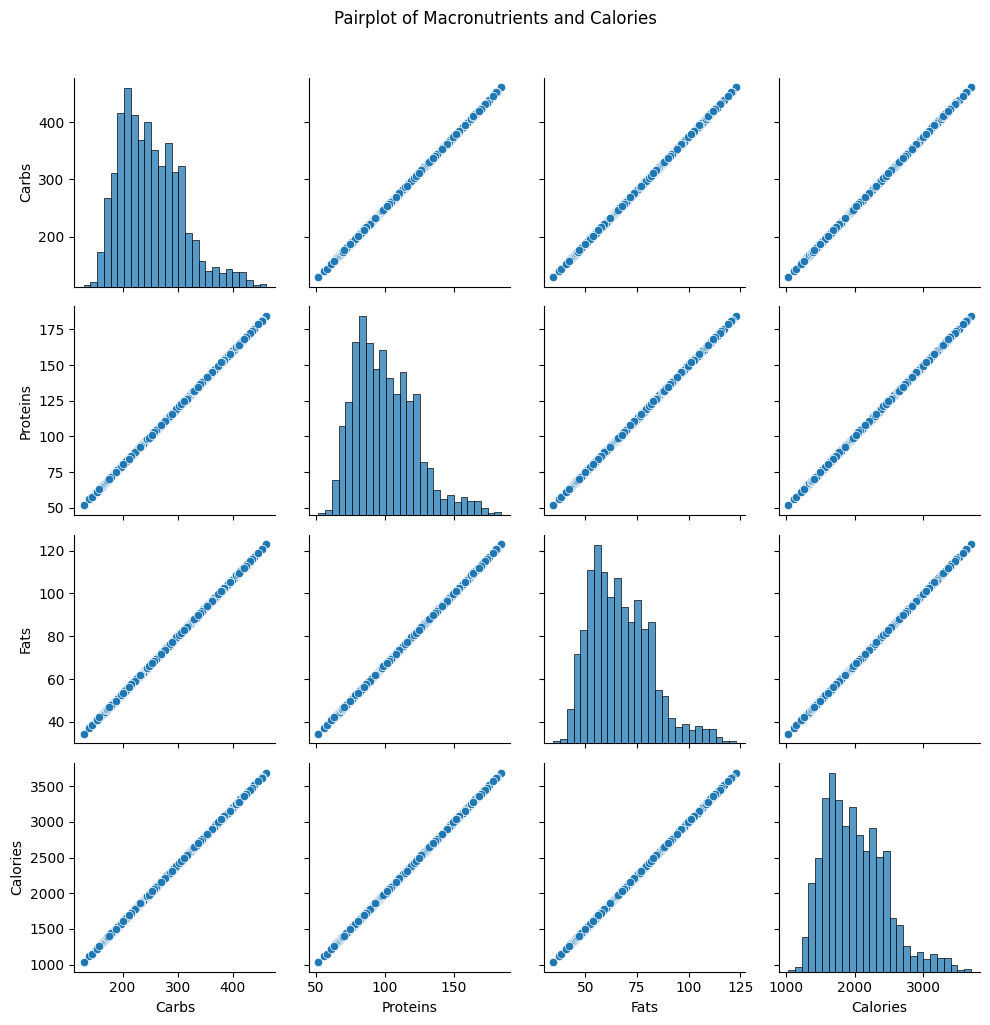

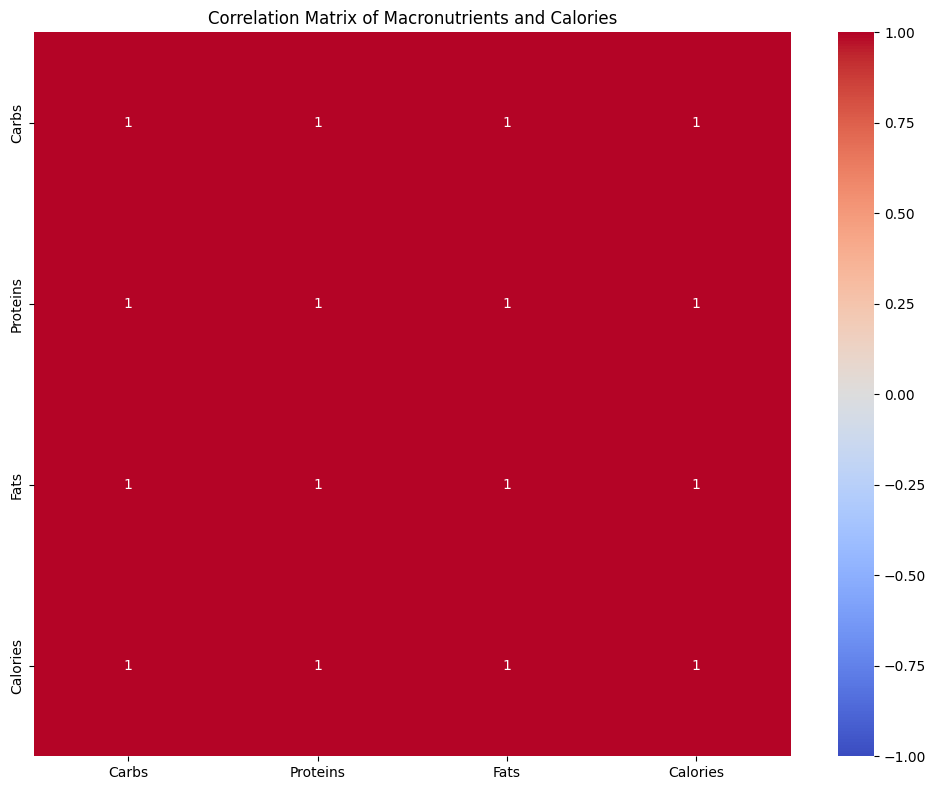

Correlation coefficients with Calories:
Calories    1.0
Carbs       1.0
Proteins    1.0
Fats        1.0
Name: Calories, dtype: float64

Average percentage contribution to total calories:
Carbs_Percentage       50.000004
Proteins_Percentage    20.000000
Fats_Percentage        29.999997
dtype: float64


/var/folders/dh/v1sv1c0j4x36j10zr8nh0xlh0000gn/T/ipykernel_35196/4137877550.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Macronutrients', bbox_to_anchor=(1.05, 1), loc='upper left')


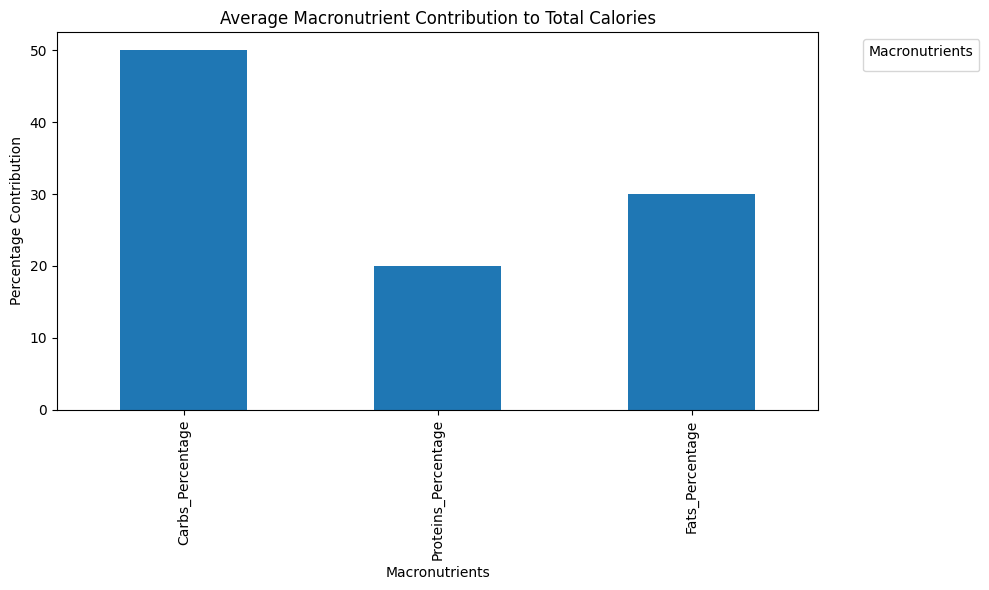


Interpretation:
The macronutrient with the highest correlation to total calorie intake is: Carbs
This suggests that Carbs intake has the strongest relationship with overall calorie consumption.


In [10]:
plt.figure(figsize=(12, 10))
sns.pairplot(df[['Carbs', 'Proteins', 'Fats', 'Calories']])
plt.suptitle('Pairplot of Macronutrients and Calories', y=1.02)
plt.tight_layout()
plt.show()

correlation_matrix = df[['Carbs', 'Proteins', 'Fats', 'Calories']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Macronutrients and Calories')
plt.tight_layout()
plt.show()

correlations_with_calories = correlation_matrix['Calories'].sort_values(ascending=False)
print("Correlation coefficients with Calories:")
print(correlations_with_calories)

df['Carbs_Calories'] = df['Carbs'] * 4
df['Proteins_Calories'] = df['Proteins'] * 4
df['Fats_Calories'] = df['Fats'] * 9

df['Carbs_Percentage'] = df['Carbs_Calories'] / df['Calories'] * 100
df['Proteins_Percentage'] = df['Proteins_Calories'] / df['Calories'] * 100
df['Fats_Percentage'] = df['Fats_Calories'] / df['Calories'] * 100

average_percentages = df[['Carbs_Percentage', 'Proteins_Percentage', 'Fats_Percentage']].mean()
print("\nAverage percentage contribution to total calories:")
print(average_percentages)

plt.figure(figsize=(10, 6))
average_percentages.plot(kind='bar', stacked=True)
plt.title('Average Macronutrient Contribution to Total Calories')
plt.xlabel('Macronutrients')
plt.ylabel('Percentage Contribution')
plt.legend(title='Macronutrients', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nInterpretation:")
highest_correlation = correlations_with_calories.index[1]  # Index 0 is Calories itself
print(f"The macronutrient with the highest correlation to total calorie intake is: {highest_correlation}")
print(f"This suggests that {highest_correlation} intake has the strongest relationship with overall calorie consumption.")

## Hypothesis - 2:
### Male users consume more calories than female users on average. 

Objective: Test if there is a significant difference in calorie intake between genders.
### Riya Agarwal (50609491)


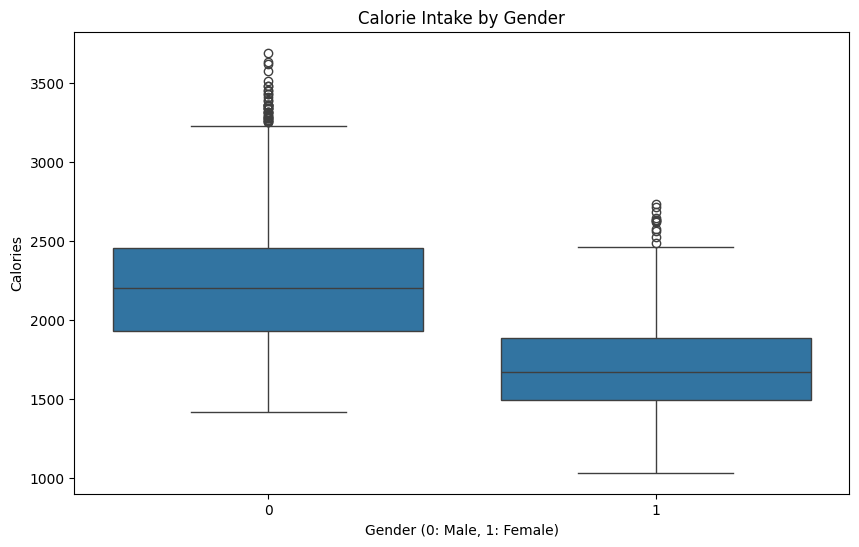

T-statistic: 31.346863206616725
P-value: 3.2266758500920674e-177
Mean calorie intake for males: 2225.04
Mean calorie intake for females: 1710.20
The difference in calorie intake between genders is statistically significant.


In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Calories', data=df)
plt.title('Calorie Intake by Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Calories')
plt.show()

male_calories = df[df['Gender'] == 0]['Calories']
female_calories = df[df['Gender'] == 1]['Calories']

t_statistic, p_value = stats.ttest_ind(male_calories, female_calories)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

male_mean = male_calories.mean()
female_mean = female_calories.mean()
print(f"Mean calorie intake for males: {male_mean:.2f}")
print(f"Mean calorie intake for females: {female_mean:.2f}")

alpha = 0.05
if p_value < alpha:
    print("The difference in calorie intake between genders is statistically significant.")
else:
    print("There is no statistically significant difference in calorie intake between genders.")

## Hypothesis-3:
### Age influences BMR and thus affects total calorie requirements.
Objective: Determine how BMR changes with age and its relationship with calorie intake.
### Harshita Sherla(50593920)

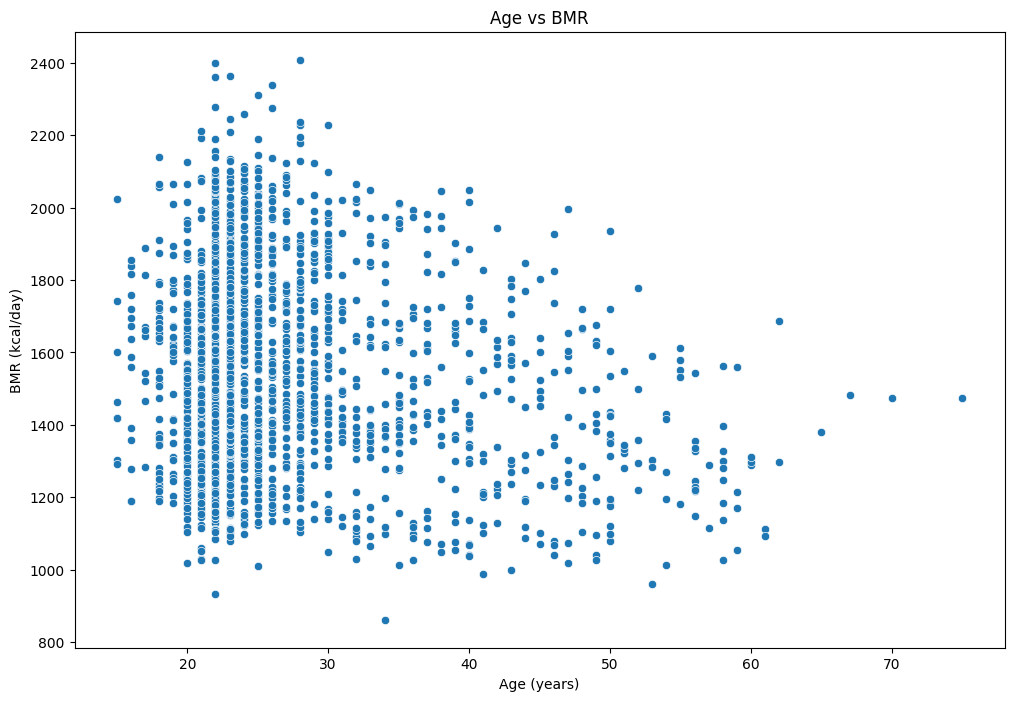

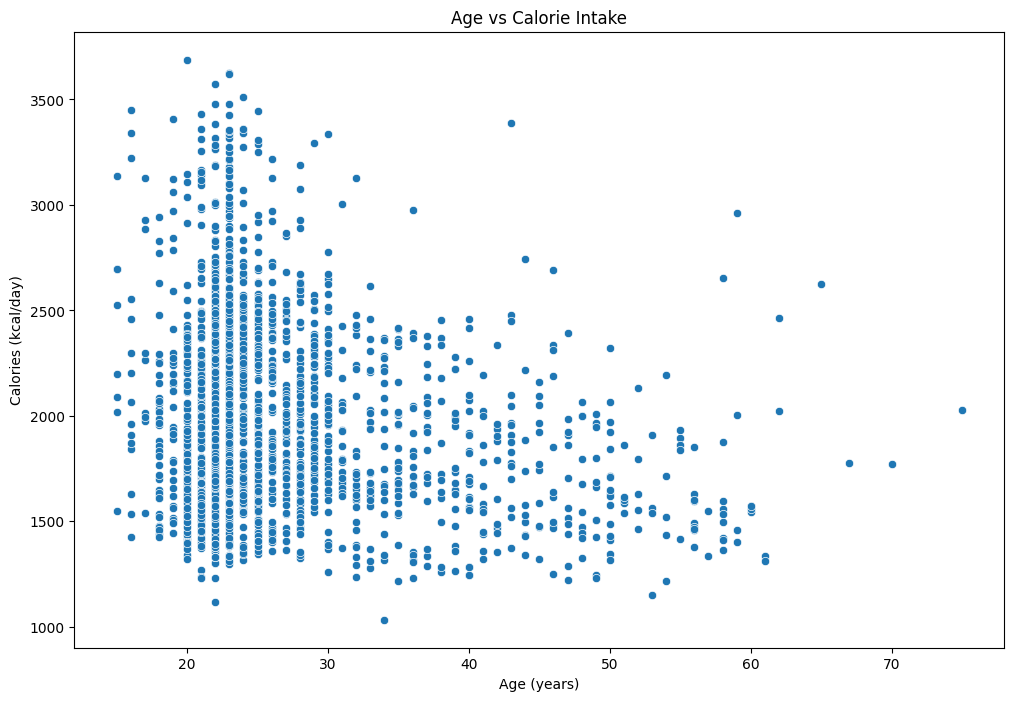

Correlation between Age and BMR: -0.1810 (p-value: 0.0000)
Correlation between Age and Calorie Intake: -0.2258 (p-value: 0.0000)


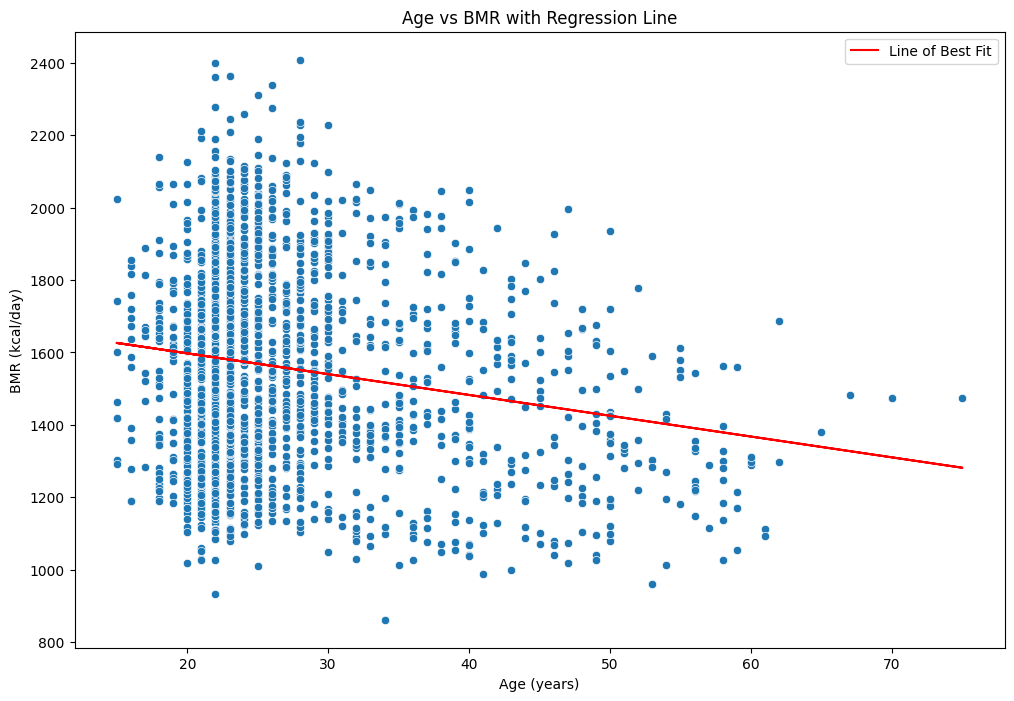

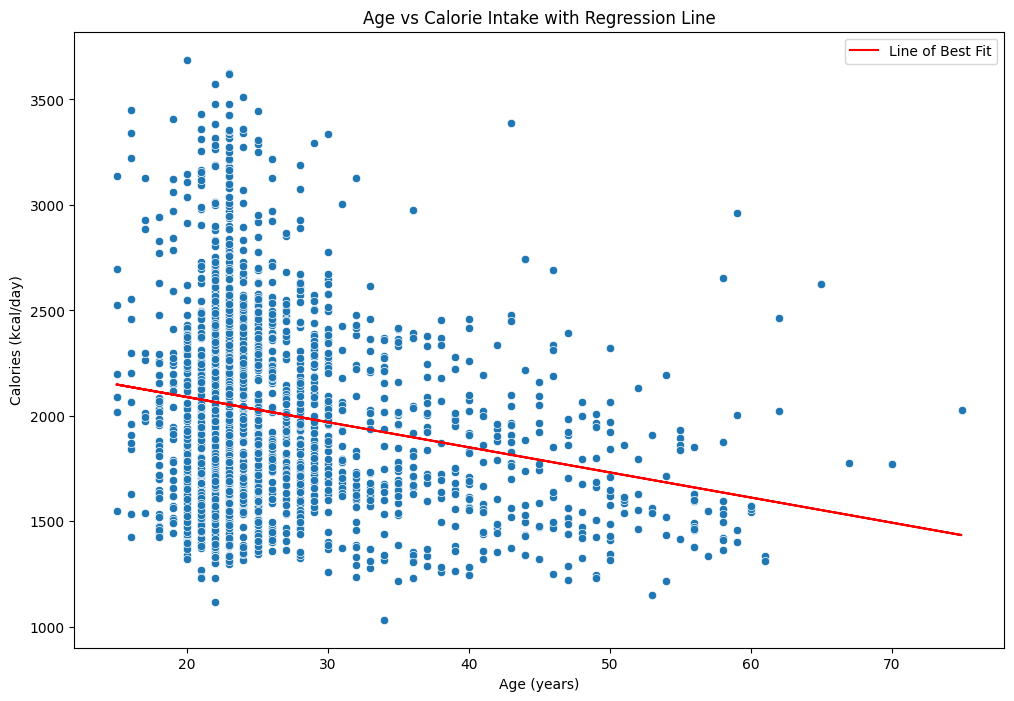


Interpretation:
There is a statistically significant relationship between Age and BMR.
There is a statistically significant relationship between Age and Calorie Intake.


In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='BMR', data=df)
plt.title('Age vs BMR')
plt.xlabel('Age (years)')
plt.ylabel('BMR (kcal/day)')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Calories', data=df)
plt.title('Age vs Calorie Intake')
plt.xlabel('Age (years)')
plt.ylabel('Calories (kcal/day)')
plt.show()

correlation_bmr_age, p_value_bmr_age = stats.pearsonr(df['Age'], df['BMR'])
correlation_calories_age, p_value_calories_age = stats.pearsonr(df['Age'], df['Calories'])

print(f"Correlation between Age and BMR: {correlation_bmr_age:.4f} (p-value: {p_value_bmr_age:.4f})")
print(f"Correlation between Age and Calorie Intake: {correlation_calories_age:.4f} (p-value: {p_value_calories_age:.4f})")

slope_bmr, intercept_bmr, r_value_bmr, p_value_bmr, std_err_bmr = stats.linregress(df['Age'], df['BMR'])

line_bmr = slope_bmr * df['Age'] + intercept_bmr
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='BMR', data=df)
plt.plot(df['Age'], line_bmr, color='red', label='Line of Best Fit')
plt.title('Age vs BMR with Regression Line')
plt.xlabel('Age (years)')
plt.ylabel('BMR (kcal/day)')
plt.legend()
plt.show()

slope_calories, intercept_calories, r_value_calories, p_value_calories, std_err_calories = stats.linregress(df['Age'], df['Calories'])

line_calories = slope_calories * df['Age'] + intercept_calories
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Calories', data=df)
plt.plot(df['Age'], line_calories, color='red', label='Line of Best Fit')
plt.title('Age vs Calorie Intake with Regression Line')
plt.xlabel('Age (years)')
plt.ylabel('Calories (kcal/day)')
plt.legend()
plt.show()

print("\nInterpretation:")
if p_value_bmr < 0.05:
    print("There is a statistically significant relationship between Age and BMR.")
else:
    print("There is no statistically significant relationship between Age and BMR.")

if p_value_calories < 0.05:
    print("There is a statistically significant relationship between Age and Calorie Intake.")
else:
    print("There is no statistically significant relationship between Age and Calorie Intake.")

## Hypothesis-4:
### People with higher BMR consume more proteins.

Objective: Test whether individuals with higher BMR have a diet richer in proteins.
### Harshita Sherla(50593920)

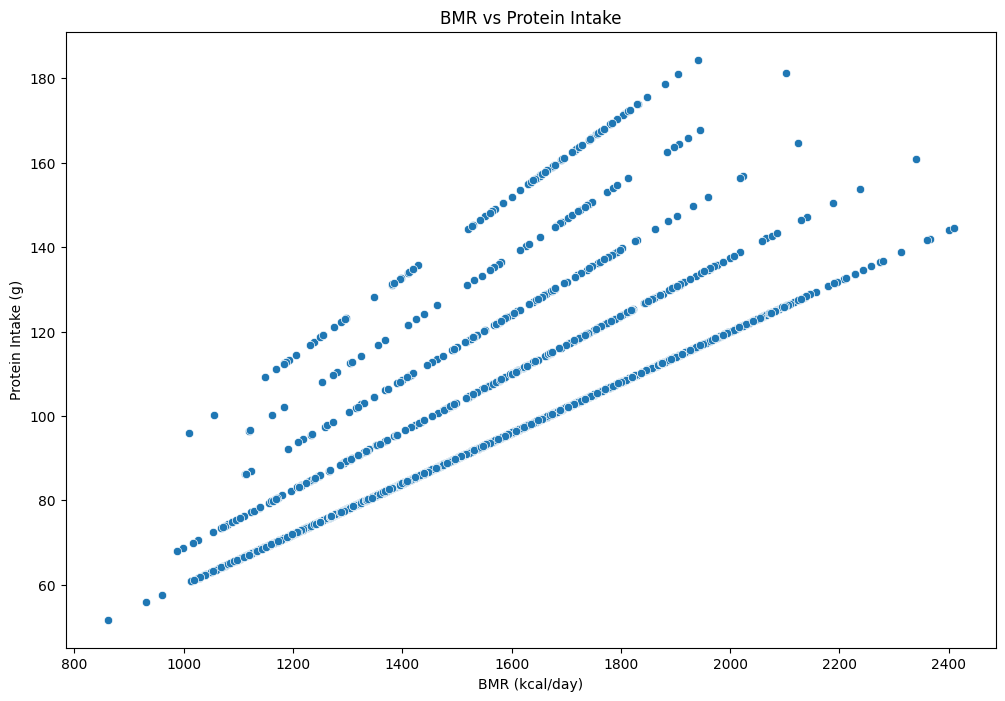

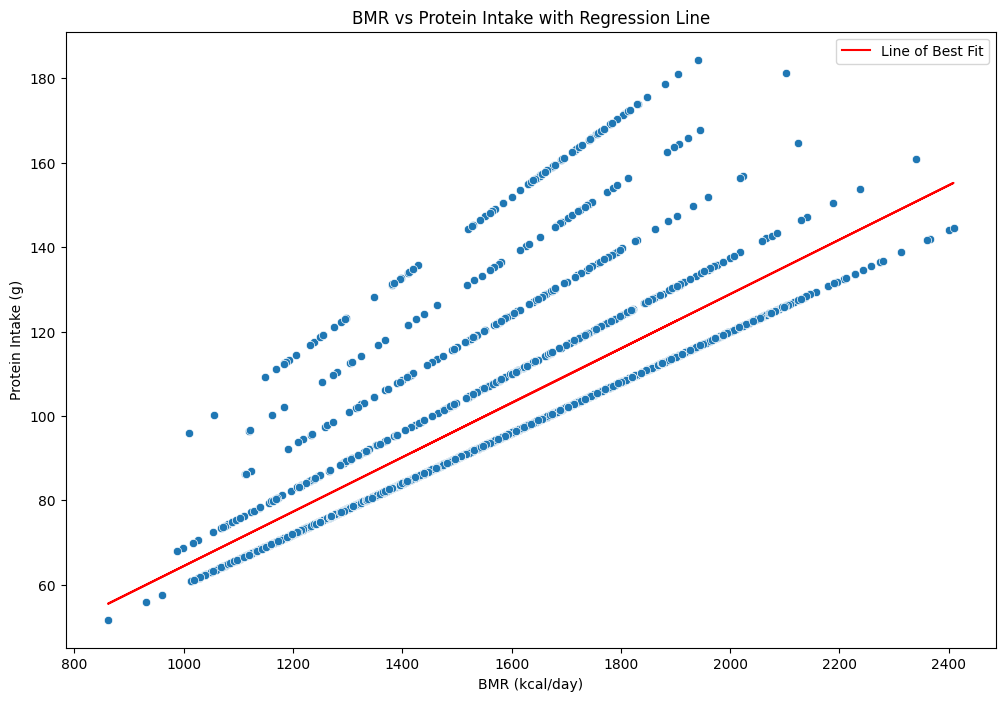

Slope: 0.0645
Intercept: -0.0559
R-squared: 0.6032
P-value: 0.0000e+00
Correlation coefficient: 0.7766

Mean BMR: 1558.23 kcal/day
Mean Protein Intake: 100.39 g
Mean Protein Intake for High BMR group: 116.43 g
Mean Protein Intake for Low BMR group: 84.98 g

t-test p-value: 2.9853e-307

Interpretation:
There is a statistically significant relationship between BMR and protein intake.
The relationship between BMR and protein intake is strong.
As BMR increases, protein intake tends to increase.
There is a significant difference in protein intake between high and low BMR groups.


In [5]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='BMR', y='Proteins', data=df)
plt.title('BMR vs Protein Intake')
plt.xlabel('BMR (kcal/day)')
plt.ylabel('Protein Intake (g)')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(df['BMR'], df['Proteins'])

line = slope * df['BMR'] + intercept

plt.figure(figsize=(12, 8))
sns.scatterplot(x='BMR', y='Proteins', data=df)
plt.plot(df['BMR'], line, color='red', label='Line of Best Fit')
plt.title('BMR vs Protein Intake with Regression Line')
plt.xlabel('BMR (kcal/day)')
plt.ylabel('Protein Intake (g)')
plt.legend()
plt.show()

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4e}")

correlation_coefficient = df['BMR'].corr(df['Proteins'])
print(f"Correlation coefficient: {correlation_coefficient:.4f}")

mean_bmr = df['BMR'].mean()
mean_protein = df['Proteins'].mean()
high_bmr = df[df['BMR'] > mean_bmr]
low_bmr = df[df['BMR'] <= mean_bmr]

print(f"\nMean BMR: {mean_bmr:.2f} kcal/day")
print(f"Mean Protein Intake: {mean_protein:.2f} g")
print(f"Mean Protein Intake for High BMR group: {high_bmr['Proteins'].mean():.2f} g")
print(f"Mean Protein Intake for Low BMR group: {low_bmr['Proteins'].mean():.2f} g")

t_statistic, t_p_value = stats.ttest_ind(high_bmr['Proteins'], low_bmr['Proteins'])
print(f"\nt-test p-value: {t_p_value:.4e}")

print("\nInterpretation:")
if p_value < 0.05:
    print("There is a statistically significant relationship between BMR and protein intake.")
else:
    print("There is no statistically significant relationship between BMR and protein intake.")

if r_value**2 > 0.5:
    print("The relationship between BMR and protein intake is strong.")
elif r_value**2 > 0.3:
    print("The relationship between BMR and protein intake is moderate.")
else:
    print("The relationship between BMR and protein intake is weak.")

if slope > 0:
    print("As BMR increases, protein intake tends to increase.")
else:
    print("As BMR increases, protein intake tends to decrease.")

if t_p_value < 0.05:
    print("There is a significant difference in protein intake between high and low BMR groups.")
else:
    print("There is no significant difference in protein intake between high and low BMR groups.")

## Hypothesis-5:
### Females tend to have lower BMR compared to males
Objective: To compare the BMR of males and females to identify any significant differences based on gender.
### Karthik Sharma Madugula (50611293)

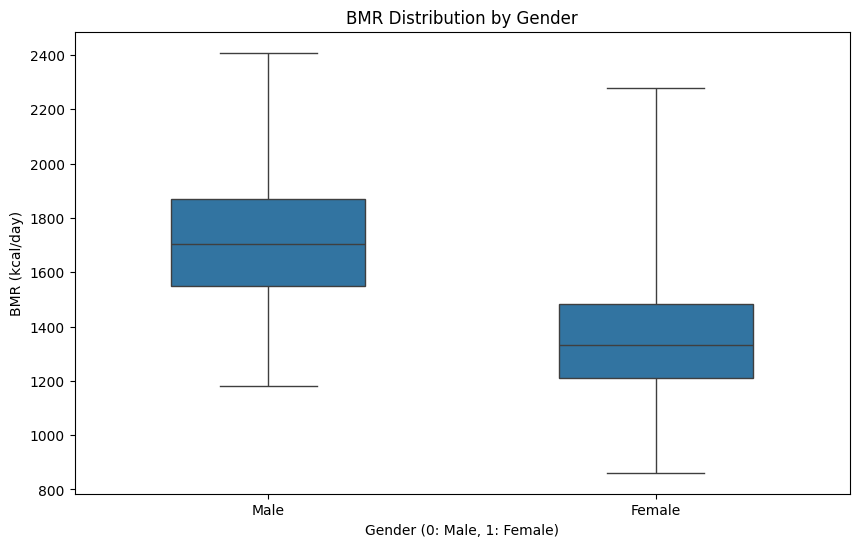

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='BMR', data=df, whis=[0, 100], width=0.5, fliersize=0)  

plt.title('BMR Distribution by Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('BMR (kcal/day)')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

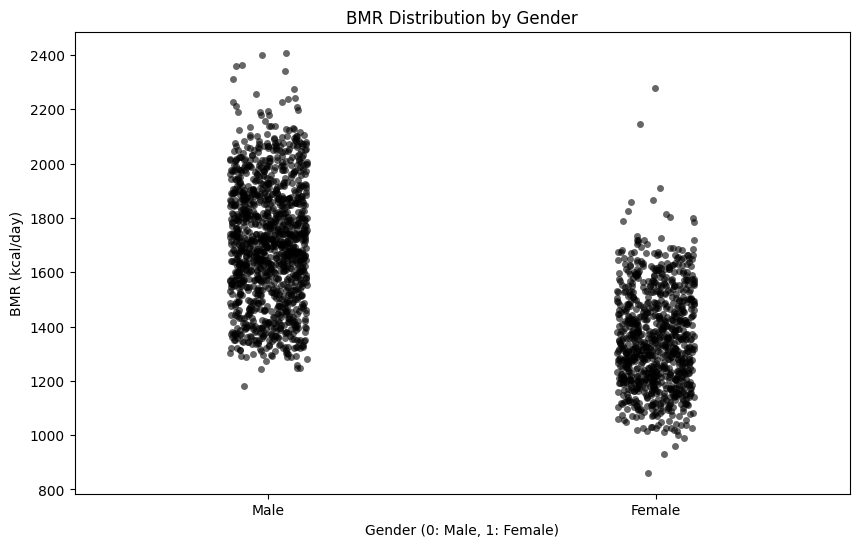

In [26]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Gender', y='BMR', data=df, color='black', alpha=0.6, jitter=True)
plt.title('BMR Distribution by Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('BMR (kcal/day)')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

## Hypothesis-6: 
### Higher Physical Exercise is Associated with Higher Calorie Intake
Objective: Test whether physical exercise is associated with higher calorie intake
### Karthik Sharma Madugula (50611293)

Correlation between physical exercise and calorie intake: 0.6409


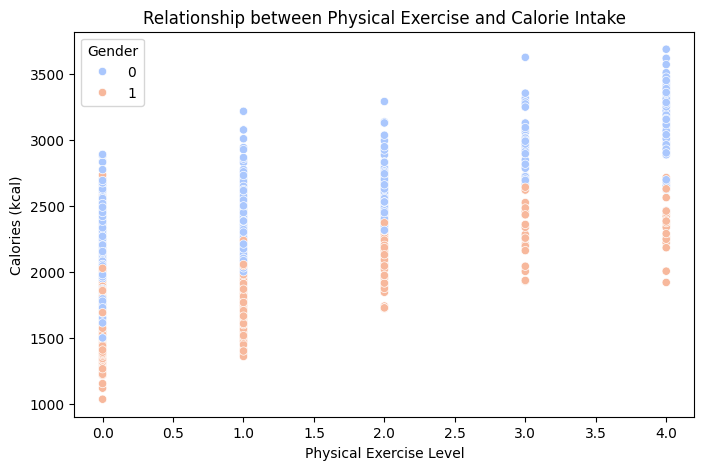

In [24]:
exercise_numeric = df['Physical exercise'].map({
    'None': 0,
    'Low': 1,
    'Moderate': 2,
    'High': 3,
    'Very High': 4
}).astype(int) 

correlation_exercise_calories = exercise_numeric.corr(df['Calories'])
print(f'Correlation between physical exercise and calorie intake: {correlation_exercise_calories:.4f}')

plt.figure(figsize=(8, 5))
sns.scatterplot(x=exercise_numeric, y=df['Calories'], hue=df['Gender'], palette='coolwarm')
plt.title('Relationship between Physical Exercise and Calorie Intake')
plt.xlabel('Physical Exercise Level')
plt.ylabel('Calories (kcal)')
plt.show()

## Hypothesis-7:
### Physical exercise frequency is positively correlated with daily protein intake among individuals aged 15-30
Objective: To investigate the relationship between the frequency of physical exercise and the frequency and daily protein intake of individuals 15-20
### Santosh Kota (50593968)


Correlation between physical exercise frequency and daily protein intake: 0.6588


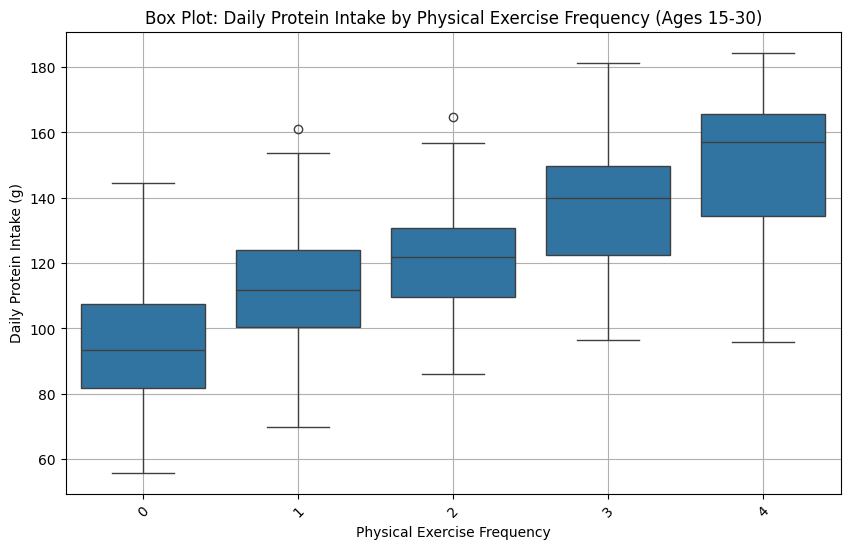

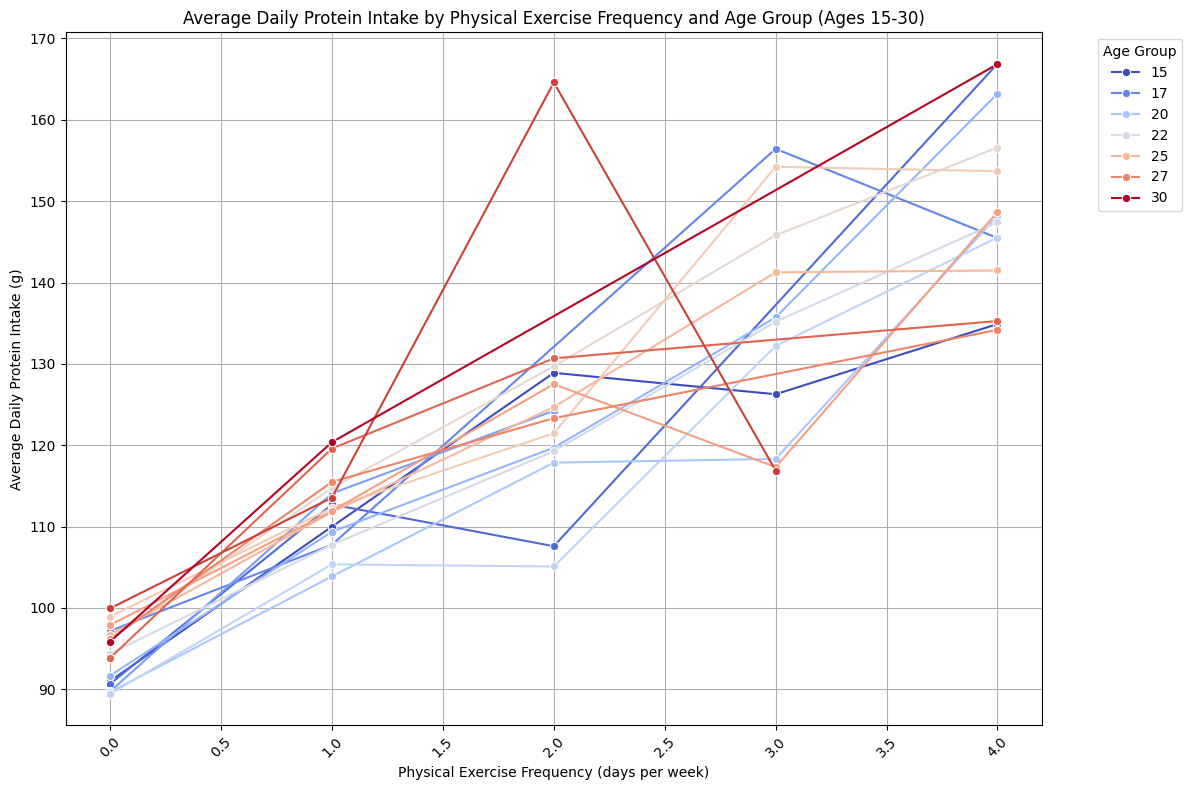

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# creating a data frame with age between 15 - 30
df_age_15_30 = df[(df['Age'] >= 15) & (df['Age'] <= 30)].copy()

exercise_mapping = {
    'None': 0,
    'Low': 1,
    'Moderate': 2,
    'High': 3,
    'Very High': 4
}

df_age_15_30['Physical exercise numeric'] = df_age_15_30['Physical exercise'].map(exercise_mapping)

correlation_protein_exercise = df_age_15_30['Physical exercise numeric'].corr(df_age_15_30['Proteins'])
print(f'Correlation between physical exercise frequency and daily protein intake: {correlation_protein_exercise:.4f}')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Physical exercise numeric', y='Proteins', data=df_age_15_30)
plt.title('Box Plot: Daily Protein Intake by Physical Exercise Frequency (Ages 15-30)')
plt.xlabel('Physical Exercise Frequency')
plt.ylabel('Daily Protein Intake (g)')
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()

avg_protein_by_exercise_age = df_age_15_30.groupby(['Physical exercise numeric', 'Age'])['Proteins'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=avg_protein_by_exercise_age, 
             x='Physical exercise numeric', 
             y='Proteins', 
             hue='Age', 
             marker='o',
             palette='coolwarm')

plt.title('Average Daily Protein Intake by Physical Exercise Frequency and Age Group (Ages 15-30)')
plt.xlabel('Physical Exercise Frequency (days per week)')
plt.ylabel('Average Daily Protein Intake (g)')
plt.grid(True)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

The correlation of 0.7451 reflects a strong relationship, indicating that individuals who engage in higher levels of physical exercise are likely to consume higher amounts of protein. 

## Hypothesis-8: 
### Body Mass Index affects Basal Metabolic rate
Objective: To look at the relationship between BMI and BMR in the general population and see if people with a higher BMI have a higher basal metabolic rate, independent of age.
### Santosh Kota(50593968) 


Correlation between BMR and BMI: 0.55
p-value: 0.0000
We have a statistically significant correlation.


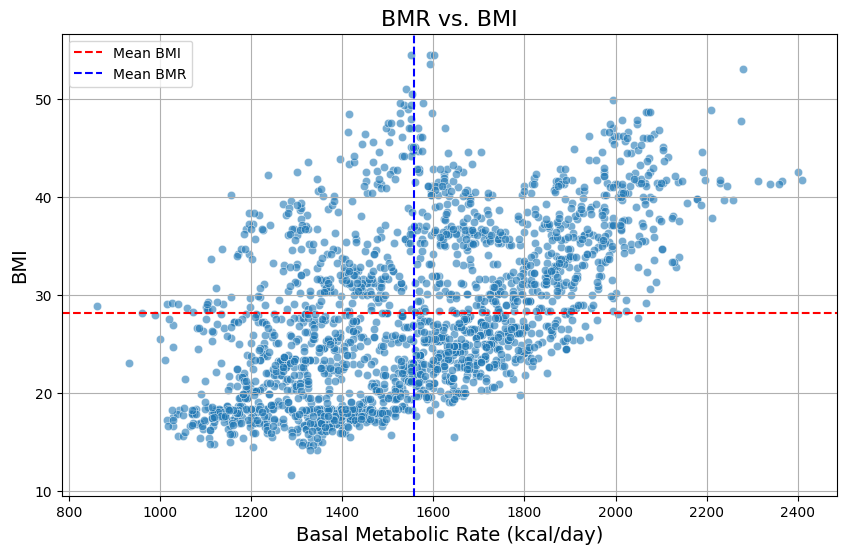

In [18]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df['BMR'], df['BMI'])

print(f'Correlation between BMR and BMI: {correlation:.2f}')
print(f'p-value: {p_value:.4f}')

if p_value < 0.05:
    print("We have a statistically significant correlation.")
else:
    print("We don't have a statistically significant correlation.")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMR', y='BMI', data=df, alpha=0.6)
plt.title('BMR vs. BMI', fontsize=16)
plt.xlabel('Basal Metabolic Rate (kcal/day)', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.axhline(y=df['BMI'].mean(), color='red', linestyle='--', label='Mean BMI')
plt.axvline(x=df['BMR'].mean(), color='blue', linestyle='--', label='Mean BMR')
plt.legend()
plt.grid()
plt.show()

From the plot we can see a positive correlation. so we can say, individuals with a higher BMI are prone to have a higher metabolic rate.

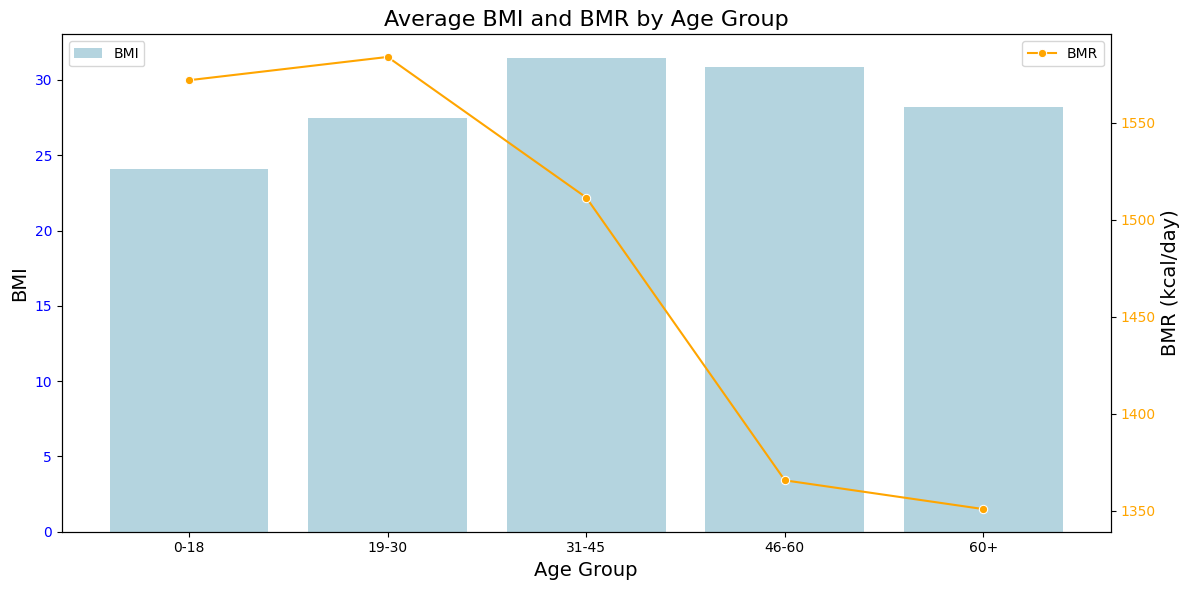

In [19]:
age_group_summary = df.groupby('Age Group', observed=True).agg({'BMI': 'mean', 'BMR': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x='Age Group', y='BMI', data=age_group_summary, ax=ax1, color='lightblue', label='BMI')
ax1.set_ylabel('BMI', fontsize=14)
ax1.set_xlabel('Age Group', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Average BMI and BMR by Age Group', fontsize=16)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
sns.lineplot(x='Age Group', y='BMR', data=age_group_summary, ax=ax2, color='orange', marker='o', label='BMR')
ax2.set_ylabel('BMR (kcal/day)', fontsize=14)
ax2.tick_params(axis='y', labelcolor='orange')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Based on this relationship between age groups, BMR, and BMI, we may conclude that middle-aged persons may have a high BMI while maintaining a steady or high BMR, whereas older adults often suffer a drop in BMR and BMI, due to various lifestyle and dietary factors.

## Hypothesis-9: 
### Eating more meals each day leads to higher BMI
Objective: To determine whether eating more frequently throughout the day is associated with a higher BMI.
### Karthik Sharma Madugula (50611293)

Correlation between Number of Meals per Day and BMI: 0.18
p-value: 0.0000
we have a statistically significant correlation.


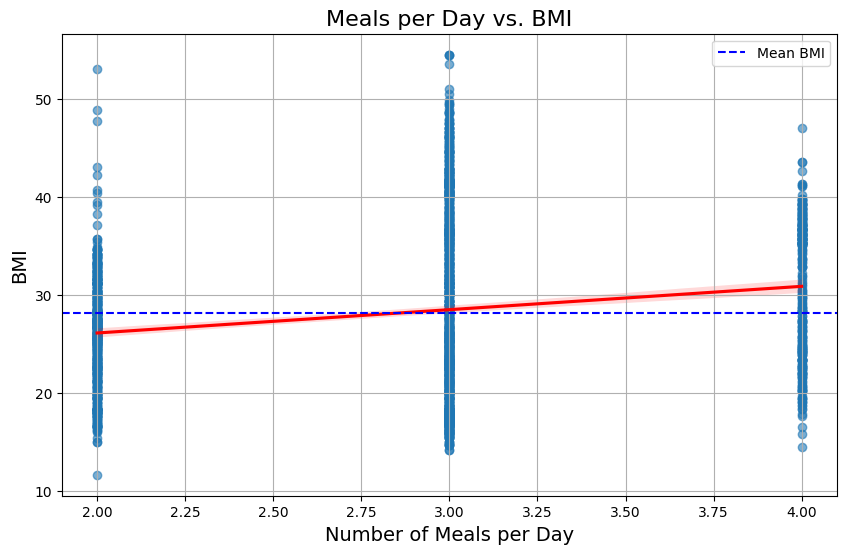

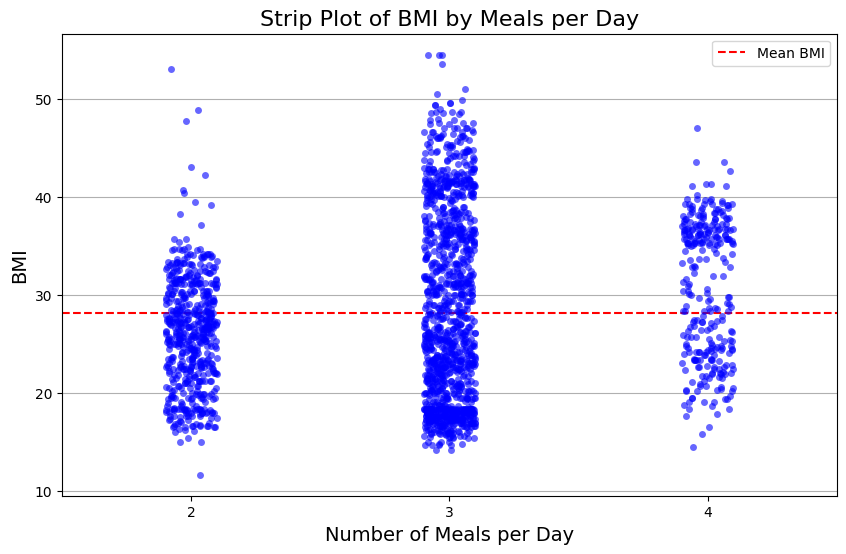

In [20]:
correlation, p_value = pearsonr(df['Daily meals frequency'], df['BMI'])

print(f'Correlation between Number of Meals per Day and BMI: {correlation:.2f}')
print(f'p-value: {p_value:.4f}')

if p_value < 0.05:
    print("we have a statistically significant correlation.")
else:
    print("we don't have a statistically significant correlation.")
plt.figure(figsize=(10, 6))
sns.regplot(x='Daily meals frequency', y='BMI', data=df, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Meals per Day vs. BMI', fontsize=16)
plt.xlabel('Number of Meals per Day', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.axhline(y=df['BMI'].mean(), color='blue', linestyle='--', label='Mean BMI')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.stripplot(x='Daily meals frequency', y='BMI', data=df, color='blue', alpha=0.6, jitter=True)
plt.title('Strip Plot of BMI by Meals per Day', fontsize=16)
plt.xlabel('Number of Meals per Day', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.axhline(y=df['BMI'].mean(), color='red', linestyle='--', label='Mean BMI')
plt.legend()
plt.grid(axis='y')
plt.show()



Based on the scatter plot, as the number of meals increases, there is a slight increase in BMI as well,